# Ομάδα 16
## Άγγελος Μητροκώτσας 03118197
## Ορέστης Ζάρας 03118207
## Γιώργος Τσιακατάρας 03118130

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 348 kB 18.7 MB/s 
     |████████████████████████████████| 81 kB 8.3 MB/s 
     |████████████████████████████████| 209 kB 56.0 MB/s 
     |████████████████████████████████| 78 kB 7.5 MB/s 
     |████████████████████████████████| 50 kB 6.2 MB/s 
     |████████████████████████████████| 147 kB 22.8 MB/s 
     |████████████████████████████████| 112 kB 57.2 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11136 sha256=a22367803f457c6be04ca9c69480263ddf816c410ec1094737609407a7f61028
  Stored in directory: /root/.cache/pip/wheels/7f/1a/65/84ff8c386bec21fca6d220ea1f5498a0367883a78dd5ba6122
Successfully built pyperclip


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score, accuracy_score

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

from sklearn.svm import SVC # "Support vector classifier"

In [4]:
# dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/one_dollar_spin_and_go.csv')
dataset = pd.read_csv('/content/drive/MyDrive/Νευρωνικά/one_dollar_spin_and_go.csv')
dataset

,buyin,tourn_id,table,hand_id,date,time,table_size,level,playing,seat,...,pot_turn,pot_river,ante,blinds,bet_pre,bet_flop,bet_turn,bet_river,result,balance
0,$0.92+$0.08,2929450288,1,215051507105,2020-06-07,18:15:09,3,1,3,1,...,30,30,0,0,0,0,0,0,gave up,0
1,$0.92+$0.08,2929450288,1,215051507105,2020-06-07,18:15:09,3,1,3,2,...,30,30,0,10,10,0,0,0,gave up,-10
2,$0.92+$0.08,2929450288,1,215051507105,2020-06-07,18:15:09,3,1,3,3,...,30,30,0,20,20,0,0,0,took chips,10
3,$0.92+$0.08,2929450288,1,215051520234,2020-06-07,18:15:23,3,1,3,1,...,180,180,0,20,60,60,0,0,took chips,60
4,$0.92+$0.08,2929450288,1,215051520234,2020-06-07,18:15:23,3,1,3,2,...,180,180,0,0,0,0,0,0,gave up,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102610,$0.92+$0.08,3162349514,1,225348760558,2021-03-30,19:00:02,3,1,3,2,...,560,560,0,10,500,0,0,0,took chips,60
102611,$0.92+$0.08,3162349514,1,225348760558,2021-03-30,19:00:02,3,1,3,3,...,560,560,0,20,20,0,0,0,gave up,-20
102612,$0.92+$0.08,3162349514,1,225348768503,2021-03-30,19:00:25,3,1,3,1,...,1030,1030,0,20,20,50,390,0,lost,-460
102613,$0.92+$0.08,3162349514,1,225348768503,2021-03-30,19:00:25,3,1,3,2,...,1030,1030,0,0,20,50,490,0,won,470


In [5]:
dataset.shape
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102615 entries, 0 to 102614
Data columns (total 35 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   buyin         102615 non-null  object
 1   tourn_id      102615 non-null  int64 
 2   table         102615 non-null  int64 
 3   hand_id       102615 non-null  int64 
 4   date          102615 non-null  object
 5   time          102615 non-null  object
 6   table_size    102615 non-null  int64 
 7   level         102615 non-null  int64 
 8   playing       102615 non-null  int64 
 9   seat          102615 non-null  int64 
 10  name          102615 non-null  object
 11  stack         102615 non-null  int64 
 12  position      102615 non-null  object
 13  action_pre    102615 non-null  object
 14  action_flop   102615 non-null  object
 15  action_turn   102615 non-null  object
 16  action_river  102615 non-null  object
 17  all_in        102615 non-null  bool  
 18  cards         102615 non

In [6]:
print("#NaN in our dataset =", np.sum(np.sum(dataset.isna())))

#NaN in our dataset = 84175


In [7]:
results = dataset.iloc[:,-2].values
freq = np.array(np.unique(results, return_counts=True)).T
percentage = []
for i in range(0,4):
  percentage.append([freq[i][0], freq[i][1] * 100/102615])
print("The #No of attributes belonging to each class: \n", freq, "\n")

print("The % percentage of attributes of each class: \n", percentage,)

The #No of attributes belonging to each class: 
 [['gave up' 50728]
 ['lost' 10028]
 ['took chips' 31087]
 ['won' 10772]] 

The % percentage of attributes of each class: 
 [['gave up', 49.435267748379864], ['lost', 9.772450421478341], ['took chips', 30.294791209862105], ['won', 10.497490620279686]]


# Επισκόπηση Data Set.
## **Κ11: Online Poker Games, One Dollar Spin & Go**

To dataset περιέχει δεδομένα που έχουν συλλεχθεί από διαδικτυακές παρτίδες πόκερ, κυρίως τουρνουά τύπου "Spin & Go". Συγκεκριμένα κάθε εγγραφή του dataset περιγράφει το *πώς* έπαιξε ένας παίκτης σε κάποια παρτίδα και το τελικό αποτέλεσμα, δηλ αν κέρδισε ή αν έχασε.

* **Πλήθος δειγμάτων**: 102615 (γραμμές από το 0 εώς το 102614 στο .csv αρχέιο, η τελευταία κενή εντελώς)
* **Πλήθος χαρακτηριστικών**: 35

Κάθε δείγμα του dataset περιέχει 35 χαρακτηριστικά ένα εκ των οποίων είναι το αποτέλεσμα και ένα το τελικό ποσό που κέρδισε ή έχασε ο παίκτης. Ορισμένα από τα υπόλοιπα χαρακτηριστικά αφορούν τη συγκεκριμένη παρτίδα και είναι κοινά για εγγραφές για διαφορετικούς παίκτες στην ίδια παρτίδα. Τέτοια χαρακτηριστικά είναι το id της παρτίδας, ο χρόνος διεξαγωγής της, τα χαρτιά που κατέβηκαν στο board, το μέγεθος του τραπεζιού, ο αριθμός παικτών κοκ. Υπάρχουν επίσης χαρακτηριστικά που περιγράφουν *πώς* έπαιξε ο συγκεκριμένος παίκτης στη συγκεκριμένη παρτίδα, όπως: η θέση του στο τραπέζι, τα χαρτιά του, οι ενέργειες και τα πονταρίσματά του σε κάθε γύρο πονταρίσματος, κα.

* **Μη διατεταγμένα χαρακτηριστικά**: Όχι
* **Είδος όλων των χαρακτηριστικών**: 

**Με βάση τον δημιουργό του dataset**: Από τις 35 στήλες, οι 17 έχουν χαρακτηριστικά τύπου Integer, οι 13 τύπου String, οι 2 DateTime και 3 αναγράφονται ως "Άλλο".

**Με βάση το dataset.info():** 19 στήλες με δεδομένα τύπου Integer, 15 με τύπου Object και 1 με τύπου Boolean.

* **Απουσιάζουσες τιμές:** Οι μόνες απουσιάζουσες τιμές βρίσκονται στο χαρακτηριστικό combination (που είναι ο συνδυασμός των χαρτιών του παίκτη). Παρόλα αυτά η παράληψή τους δεν αποτελεί αμέλεια στη δημιουργία του dataset, αλλά σημαντικό στοιχείο για τον τρόπο παιχνιδιού του παίκτη. Σημαίνει ότι ο παίκτης δεν παρέμεινε μέχρι το τέλος της παρτίδας (είτε επειδή αποσύρθηκε, είτε επειδή αποσύρθηκαν όλοι οι άλλοι και η παρτίδα δεν ολοκληρώθηκε). Για αυτό το λόγο οι απουσιάζουσες τιμές γεμίζονται με τιμή "no info" ώστε να χρησιμοποιηθούν ως πληροφορία κατά την εκπαιδευση του νευρωνικού δικτύου.

* Υπάρχουν επικεφαλίδες αλλά όχι αρίθμηση γραμμών.

Οι ετικέτες των κλάσεων βρίσκονται στην προτελευταία στήλη, την **result** και είναι οι εξης:

* 1) gave up: Ο παίκτης αποσύρθηκε από την παρτίδα.

* 2) lost: Ο παίκτης έμεινε στη διεκδίκηση του γύρου μέχρι το τέλος, έδειξε τα χαρτιά του αλλά έχασε γιατί κάποιος άλλος παίκτης είχε πιο ισχυρό συνδυασμό χαρτιών.

* 3) won: Ο παίκτης έμεινε στη διεκδίκηση του γύρου μέχρι το τέλος, έδειξε τα χαρτιά του αλλά κέρδισε γιατί είχε τον πιο ισχυρό συνδυασμό χαρτιών.

* 4) took chips: Ο παίκτης ήταν ο μόνος που παρέμεινε στην παρτίδα αφού όλοι οι άλλοι αποσύρθηκαν.


* **Ισορροπία Dataset:** Παρατηρούμε πως το dataset δεν είναι απόλυτα ισορροπημένο καθώς στο ποσοστό των δειγμάτων ανά κλάση υπάρχει μεγάλη απόκλιση, καθώς οι κλάσεις gave up και took chips είναι πάνω απο 1.5 φορές (2/3) πιο συχνές από τις won και lost.


## Notes για το dataset

*   Αφαιρούμε το balance καθώς είναι αποτέλεσμα των υπόλοιπων στηλών και αν το αφήσουμε στο dataset θα βγάλουμε πολύ υψηλά scores στο training. Κρατάμε μόνο τις κλάσεις του results 


## Μετρική

Επιλέγουμ την f1 ως μετρική, καθώς συνδυάζει τα αποτελέσματα των μετρικών recall και precision και δίνει μια πιο γενική άποψη για την επίδοση του ταξινομητή, παρόλο που το αποτέλεσμα της δεν ερμηνεύεται πρακτικά τόσο εύκολα όσο η accuracy. Το πρόβλημα το οποίο πραγματεύεται το dataset δεν έχει να κάνει με κάποιο πρόβλημα υγείας ή κάτι αντίστοιχο επομένως δεν χρειάζεται να αξιολογηθεί η επίδοση του ταξινομητή δίνοντας προτεραιότητα σε κάποιο συγκεκριμένο κριτήριο όπως κάνουν οι recall και precision. Επίσης, η f1 διαχειρίζεται καλύτερα imbalanced (μη-ισορροπημένα) dataset όπως αυτό που χρησιμοποιούν οι out-of-the box ταξινομητές άρα ή σύγκριση με τους βελτιστοποιημένους (που χρησιμοποιούν ισορροπημένα datasets) είναι πιο αντικειμενική.

### Όπως είπαμε πανω, οι απουσιάζουσες τιμές γεμίζονται με τιμή "no info" ώστε να χρησιμοποιηθούν ως πληροφορία κατά την εκπαιδευση του νευρωνικού δικτύου

In [8]:
dataset["combination"] = dataset['combination'].replace(np.nan, "no info")

## Προεπεξεργασία:

Αρχικά αφαιρούμε στήλες των οποίων οι τιμές είναι σταθερές και δεν είναι χρήσιμες για την εκπαίδευση του μοντέλου. Αναλυτικά, αφαιρούνται:
* οι στήλες με χαρακτηριστικά για τα οποία ένας αντίπαλος παίκτης δεν μπορεί να έχει πληροφορία (πχ τα χαρτιά του αντιπάλου).
* οι στήλες με χαρακτηριστικά που έχουν ίδια τιμή για κάθε εγγραφή του dataset (πχ buyin, table, table_size, ante -- εξάλλου δεν προσφέρουν πληροφορία).
* οι στήλες με χαρακτηριστικά που δεν προσφέρουν ουσιαστική πληροφορία (πχ date, tourn_id, hand_id).

Παράλληλα κρατήσαμε μόνο τα πρώτα 50000 δείγματα για λόγους απόδοσης (αφού βλέπουμε ότι οι μετρικές μένουν περίπου ίδιες). Τέλος χρησιμοποιήσαμε τη LabelEncoder() ώστε να μετατρέψουμε τις κλάσεις από Strings σε μη κατηγορικά δεδομένα.

In [9]:
# preprocessing to make the data learnable
from sklearn import preprocessing

# διατηρούμε τα πρώτα 50000 δείγματα για λόγους απόδοσης και καθώς συγκλίνει αρκετά κοντά με την απόσοδη όλων των δειγμάτων
dataset = dataset[0:50000]

# μπορει να αντικατασταθει με την μέθοδο που λέει στις διαλέξεις
le = preprocessing.LabelEncoder()
dataset['result'] = le.fit_transform(dataset['result'])

# remove unessecary columns
dataset = dataset.drop(['buyin', 'date', 'time', 'name', 'seat', 'tourn_id', 'hand_id', 'balance', 'position', 'cards', 'board_flop', 'board_turn', 'board_river', 'table', 'table_size', 'ante'],axis=1)
# change non categorical to categorical
print(dataset.columns)
dataset = pd.get_dummies(dataset, columns=[list(dataset.columns)[i] for i in range(3, 9)])

Index(['level', 'playing', 'stack', 'action_pre', 'action_flop', 'action_turn',
       'action_river', 'all_in', 'combination', 'pot_pre', 'pot_flop',
       'pot_turn', 'pot_river', 'blinds', 'bet_pre', 'bet_flop', 'bet_turn',
       'bet_river', 'result'],
      dtype='object')


# Επίδοση out-of-the-box

Δαχωρίζουμε το σύνολο δεδομένων σε σύνολο εκπαίδευσης (train set) και σύνολο δοκιμών (test set) με 30% των δειγμάτων στο test set:

In [10]:
# split train and test sets
features = dataset.drop('result', axis=1)
labels = dataset['result']

train, test, train_labels, test_labels = train_test_split(features, labels, test_size=0.30)

# Dummy Classifiers with different Strategies:

In [11]:
import random
outofthebox_dictionary_f1 = {}
strategies = ['uniform', 'most_frequent', 'stratified', 'prior', 'constant']
dummy_names = ['unifrom','most_frequent','stratified', 'prior', 'constant']
name=0
for strategy in strategies:
  if(strategy == 'constant'):
   no = random.choice([0,1,2,3])
   dummy = DummyClassifier(strategy = strategy, constant = no)
   dummy = dummy.fit(train, train_labels)
   dummyname = 'constant' + str(no)
  else: 
    dummy = DummyClassifier(strategy = strategy)
    dummy = dummy.fit(train, train_labels)
    dummyname = dummy_names[name]
  dummy_pred = dummy.predict(test)
  outofthebox_dictionary_f1[dummyname] = f1_score(test_labels, dummy_pred, average="macro")
  print(classification_report(test_labels, dummy_pred))
  name = name + 1

              precision    recall  f1-score   support

           0       0.50      0.26      0.34     15317
           1       0.10      0.26      0.14      2964
           2       0.30      0.24      0.27      9272
           3       0.11      0.27      0.16      3232

    accuracy                           0.25     30785
   macro avg       0.25      0.26      0.23     30785
weighted avg       0.36      0.25      0.28     30785

              precision    recall  f1-score   support

           0       0.50      1.00      0.66     15317
           1       0.00      0.00      0.00      2964
           2       0.00      0.00      0.00      9272
           3       0.00      0.00      0.00      3232

    accuracy                           0.50     30785
   macro avg       0.12      0.25      0.17     30785
weighted avg       0.25      0.50      0.33     30785

              precision    recall  f1-score   support

           0       0.50      0.49      0.49     15317
           1       0.

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classificat

# **MLP**

In [12]:
# for the MLP default 
clf = MLPClassifier()
clf.fit(train, train_labels)
MLP_preds = clf.predict(test)
outofthebox_dictionary_f1['MLP'] = f1_score(test_labels, MLP_preds, average="macro")

print(classification_report(test_labels, MLP_preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15317
           1       0.66      0.82      0.73      2964
           2       1.00      1.00      1.00      9272
           3       0.79      0.62      0.69      3232

    accuracy                           0.94     30785
   macro avg       0.86      0.86      0.86     30785
weighted avg       0.95      0.94      0.94     30785



# **SVM**

In [ ]:
# for the SVC default
svm = SVC()
svm.fit(train, train_labels)

SVM_preds = svm.predict(test)
outofthebox_dictionary_f1['SVM'] = f1_score(test_labels, SVM_preds, average="macro")


print(classification_report(test_labels, SVM_preds))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     15317
           1       0.56      0.09      0.16      2964
           2       0.93      0.97      0.95      9272
           3       0.52      0.63      0.57      3232

    accuracy                           0.86     30785
   macro avg       0.73      0.67      0.66     30785
weighted avg       0.84      0.86      0.83     30785



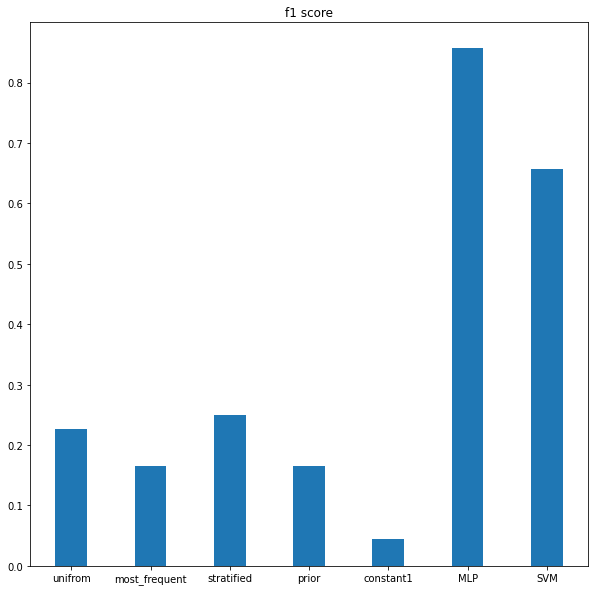

In [ ]:
from matplotlib import _png 
fig, (ax) = plt.subplots( figsize=(10, 10))

ax.set_title('f1 score')
ax.bar(outofthebox_dictionary_f1.keys(), outofthebox_dictionary_f1.values(), width=0.4)

fig.show()

**Παρατηρήσεις:**

Παρατηρούμε ότι οι επιδόσεις out of the box ταξινόμησης είναι πολύ χαμηλές εκτός του MLP και του SVM, που λαμβάνουν αρκετά υψηλές τιμές.
 
Για τους υπόλοιπους ταξινομητές παρατηρείται ότι οι επιδόσεις τους είναι αναμενόμενα χαμηλές και εξαρτώνται από την κατανομή των δεδομένων σε κλάσεις.
Για να ανεβάσουμε την επίδοση θα εκτελέσουμε διάφορες τεχνικες:


# GridSearch, pipeline and improvement to SVM and MLP parameters using **Optuna**

In [ ]:
import sklearn
import optuna

from sklearn.metrics import f1_score, accuracy_score
from imblearn.pipeline import Pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from imblearn.over_sampling import RandomOverSampler
from sklearn.decomposition import PCA
from sklearn.svm import SVC 
from sklearn.model_selection import GridSearchCV


## **MLP Optimization**

In [ ]:
scaler_t = MinMaxScaler()
train_t = train
train_t = scaler_t.fit_transform(train_t)

print(train_t.var(axis=0))
print(max(train_t.var(axis=0)))
print(len(dataset.columns))

level                                           1.630970
playing                                         0.242580
stack                                       64751.426547
pot_pre                                     90384.699031
pot_flop                                   108940.384405
                                               ...      
combination_two pair, Tens and Nines            0.000654
combination_two pair, Tens and Sevens           0.000626
combination_two pair, Tens and Sixes            0.000598
combination_two pair, Tens and Threes           0.000376
combination_two pair, Threes and Deuces         0.000390
Length: 468, dtype: float64
124334.27302584756
469


In [ ]:
mlp = MLPClassifier()

scaler = MinMaxScaler() 
selector = VarianceThreshold() # 0 το καλύτερο λογω χαμηλού μέσης τιμής variance των χαρακτηρηστικων 
ros = RandomOverSampler()
pca = PCA()

n_components = [5, 10, 20, 30, 50, 100] # CURRENT BEST: 30
vthreshold = [0, 2500, 5000, 7000, 10000] # CURRENT BEST: 0

# # create the pipeline
pipe_MLP = Pipeline(steps=[('scaler', scaler), ('selector', selector), ('sampler', ros), ('pca', pca), ('MLP', mlp)], memory='tmp')
estimator_MLP = GridSearchCV(pipe_MLP, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

estimator_MLP.fit(train, train_labels)
preds_pipeline_MLP = estimator_MLP.predict(test)


print(classification_report(test_labels, preds_pipeline_MLP))
print(estimator_MLP.best_estimator_)

/usr/local/lib/python3.8/dist-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
120 fits failed out of a total of 150.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.8/dist-packages/imblearn/pipeline.py",

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     15177
           1       0.70      0.69      0.69      3055
           2       1.00      1.00      1.00      9350
           3       0.71      0.72      0.71      3203

    accuracy                           0.94     30785
   macro avg       0.85      0.85      0.85     30785
weighted avg       0.94      0.94      0.94     30785

Pipeline(memory='tmp',
         steps=[('scaler', MinMaxScaler()),
                ('selector', VarianceThreshold(threshold=0)),
                ('sampler', RandomOverSampler()),
                ('pca', PCA(n_components=100)), ('MLP', MLPClassifier())])


In [ ]:
# create objective
def objective_MLP(trial):
  n_layers = trial.suggest_int('n_layers', 1, 2)
  layers = []
  for i in range(n_layers):
      layers.append(trial.suggest_int(f'n_units_{i}', 10, 20))


  solvers=['lbfgs', 'sgd', 'adam']
  solver_index = trial.suggest_int("solver", 0, 2)

  activations = ['identity', 'logistic', 'tanh', 'relu']
  activation_index = trial.suggest_int('activation', 0, 3)

  learning_rates = ["constant", "invscaling", "adaptive"]
  learning_rates_index = trial.suggest_int("learning_rate", 0, 2)

  max_iter = trial.suggest_categorical("max_iter", [100, 200, 300])
  tol = trial.suggest_categorical("tol", [1e-3, 1e-4, 1e-5])
  early_stopping = trial.suggest_categorical("early_stopping", [False, True])
  n_iter_no_change = trial.suggest_categorical("n_iter_no_change", [5, 10, 15])

  global train, test, train_labels, test_labels
  mlp = MLPClassifier(activation=activations[activation_index],solver=solvers[solver_index] ,hidden_layer_sizes=tuple(layers), learning_rate = learning_rates[learning_rates_index], 
    max_iter = max_iter, tol = tol, early_stopping = early_stopping, n_iter_no_change = n_iter_no_change)

  selector = VarianceThreshold(threshold=0)
  scaler = MinMaxScaler()
  ros = RandomOverSampler()
  pca = PCA(n_components=100)
  pipeline = Pipeline(steps = [('scaler', scaler), ('selector', selector),  ('sampler', ros), ('pca', pca), ('MLP', mlp)])
  pipeline.fit(train, train_labels)
  preds = pipeline.predict(test)

  return f1_score(preds, test_labels, average='macro')

study = optuna.create_study(direction='maximize')
study.optimize(objective_MLP, n_trials=30, n_jobs=-1)


[I 2022-12-06 14:56:20,857] A new study created in memory with name: no-name-ce120401-c561-4d21-b359-3409951eb034
[I 2022-12-06 14:57:16,238] Trial 1 finished with value: 0.8710067884104644 and parameters: {'n_layers': 2, 'n_units_0': 12, 'n_units_1': 18, 'solver': 2, 'activation': 0, 'learning_rate': 1, 'max_iter': 200, 'tol': 0.0001, 'early_stopping': True, 'n_iter_no_change': 10}. Best is trial 1 with value: 0.8710067884104644.
[I 2022-12-06 14:57:54,037] Trial 2 finished with value: 0.8677965546816011 and parameters: {'n_layers': 2, 'n_units_0': 11, 'n_units_1': 12, 'solver': 2, 'activation': 0, 'learning_rate': 0, 'max_iter': 100, 'tol': 0.001, 'early_stopping': True, 'n_iter_no_change': 10}. Best is trial 1 with value: 0.8710067884104644.
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
[I 2022-12-06 14:

In [ ]:
# best mlp pipe with fit


## **SVC optimization**

In [ ]:
#  based on best parameters
svc = SVC()

scaler = MinMaxScaler()
selector = VarianceThreshold()
ros = RandomOverSampler()
pca = PCA()

vthreshold = [0, 0.01, 0.02, 0.03]
n_components = [5, 10, 20, 30, 50, 100]


# create the pipeline
pipe_SVC = Pipeline(steps=[('scaler', scaler), ('selector', selector),  ('sampler', ros), ('pca', pca), ('SVC', svc)], memory='tmp')
estimator_SVC = GridSearchCV(pipe_SVC, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_macro', n_jobs=-1)

estimator_SVC.fit(train, train_labels)
preds_pipeline_SVC = estimator_SVC.predict(test)

print(classification_report(test_labels, preds_pipeline_SVC))
print(estimator_SVC.best_estimator_)

NameError: ignored

In [ ]:
# create objective
def objective_SVC(trial):
  m_C = trial.suggest_float("C", 0, 1)
  m_degree = trial.suggest_int("degree", 1, 10)

  # cant be precomputed matrix 
  kernels = ['linear', 'poly', 'rbf', 'sigmoid']
  kernel_index = trial.suggest_int("kernel", 0, 3)
  gamma = trial.suggest_loguniform("gamma", 20.0, 100.0)
  tol = trial.suggest_categorical("tol", [1e-3, 1e-4, 1e-5])
  max_iter = trial.suggest_categorical("max_iter", [10000])
  
  
  global train, test, train_labels, test_labels
  
  svm = SVC(C=m_C, kernel=kernels[kernel_index] , degree=m_degree, gamma = gamma, tol = tol, max_iter = max_iter)
  # #ΔΙΚΕΣ ΜΟΥ ΑΛΛΑΓΕΣ, ΑΝ ΔΕΝ ΤΑΙΡΙΑΖΟΥΝ ΜΕ ΤΑ ΚΑΤΩ ΣΒΗΣΤΑ
  
  selector = VarianceThreshold(threshold=0)
  scaler = MinMaxScaler()
  ros = RandomOverSampler()
  pca = PCA(n_components=100)
  pipeline = Pipeline(steps = [('scaler', scaler), ('selector', selector),  ('sampler', ros), ('pca', pca), ('SVC', svm)])
  pipeline.fit(train, train_labels)
  preds = pipeline.predict(test)

  return f1_score(preds, test_labels, average='macro')
  
  
study = optuna.create_study(direction='maximize')
study.optimize(objective_SVC, n_trials=20, n_jobs=-1)


In [ ]:
#best svc pipe

### **Παρατηρήσεις για τον MLP:**

Στην περίπτωση του MLP έγιναν δοκιμές χρησιμοποιώντας ολόκληρο το dataset. Έγιναν δοκιμές για πολλές υπερπαραμέτρους με τη διαδικασία που αναφέρεται πιο κάτω και στο τέλος κρατήθηκαν οι εξής: hidden_layer_sizes, activation, solver, learning_rate, max_iter, tol, early_stopping, n_iter, no_change. ***(Αξίζει να σημειωθεί ότι έγιναν δοκιμές με πιο πιο περιορισμένα εύρη τιμών απο αυτά που φαίνονται πιο πάνω και η επίδοση δεν ξεπερνούσε το 0.87, πιο πάνω φαίνεται μια πιο γενική προσπάθεια που και πάλι δεν κατάφερε να ξεπεράσει το ταβάνι του 0.87.)***

Για το pipeline επιλέχθηκε η σειρά έδινε καλύτερα αποτελέσματα: sampler > selector > scaler > pca > classifier.

Ο sampler χρησιμοποιήθηκε διότι το αρχικό dataset δεν είναι ισορροπημένο

Για τον selector παρατηρείται ότι δεν αφαίρεσε κανένα χαρακτηριστικό αφού στις περισσότερες καλές δοκιμές τα διατηρεί όλα επομένως ήταν όλα χρήσιμα

***Για τον scaler χρησιμοποιήθηκαν MinMax (κανονικοποίηση δεδομένων στο [-1,1]) και standard (κανονικοποίηση δεδομένων στο [0,1]),*** γενικά κανένας από τους δύο δεν φάνηκε να υπερέχει σημαντικά ***αλλά ο βέλτιστος ταξινομητής χρησιμοποιεί τον StandardScaler.***

O pca χρησιμοποιείται για να μειωθεί η διαστατικότητα του dataset η οποία είναι μεγάλη διότι κάποια χαρακτηριστικά έχουν μεγάλο εύρος τιμών (πχ ο τρόπος παιχνιδιού του παίκτη σε κάθε γύρο πονταρίσματος -- χαρακτηριστικά action).

Για την υπερπαράμετρο n_components παρατηρήσαμε ότι η επίδοση βελτιώνεται για τιμή ίση με ***23 (ΓΙΑ ΕΜΑΣ 19 ΕΙΝΑΙ, ΤΣΕΚΑΡΕ ΑΝ ΙΣΧΥΕΙ) *** 

***Η Relu είχε σταθερά καλύτερη επίδοση από όλες τις activation functions του hidden layer***

***Για το hidden_layer_size οι τιμές που δοκιμάσαμε δεν είχαν μεγάλη επίδραση στην επίδοση***

### **Παρατηρήσεις για τον SVM:**

*** Αρχικά έγινε δοκιμή για ολόκληρο το dataset όμως η διάρκεια εκτέλεσης ήταν απαγορευτική και οδηγούσε σε αποσύνδεση από το colab. Για αυτό το λόγο έγινε stratified sampling και διατηρήθηκε περιπου το 50% των δειγμάτων, δηλαδη 50000 δείγματα *** **(δοκιμάσαμε να το τρέξουμε με 10 χιλιάδες, 20, 30 κλπ χιλιάδες και είδαμε πως μέχρι τα 50,000 τρέχει κανονικά, μετά αργεί υπερβολικά πολύ και αποσυνδέεται το colab (crashάρει))**. Στη συνέχεια έγινε δοκιμή για πολλές υπερπαραμέτρους με τη διαδικασία που αναφέρεται πιο κάτω και στο τέλος κρατήθηκαν οι εξής: C, kernel, degree, gamma, tol, max_iter.

***Συγκεκριμένα δοκιμάσαμε τους scalers MinMax και Standard και από τους δύο φαινόταν να έχει σταθερά καλύτερη απόδοση ο Standard***

Επίσης, μετά απο πολλές δοκιμές στα n_components σε διάφορα εύρη τιμή μέχρι το ***19 (συνολικός αριθμός χαρακτηριστικών) παρατηρήθηκε ότι για λιγότερα από 19 οι τιμές ήταν χειρότερες επομένως διατηρήσαμε τη τιμή της υπερπαραμέτρου στο 19***

Σχετικά με το kernel καλύτερη επίδοση κατά κανόνα παρουσιάζονταν ***για τιμή "poly"***

Για το degree έγιναν δοκιμές στο εύρος 1-50 και παρατηρήθηκε ότι βέλτιστη επίδοση υπήρχε για τιμές κοντά στο ***5 γύρω από το οποίο έγιναν καινούργιες δοκιμές με πιο περιορισμένο εύρος και μικρότερο βήμα. Στη συνέχεια παρατηρήσαμε ότι η καλύτερη τιμή ήταν το 5 το οποίο τελικά και διατήρσαμε***

Για την υπερπαράμετρο gamma ξεκινήσαμε από πολύ μεγάλο παράθυρο τιμών και καταλήξαμε ότι*** βέλτιστα αποτελέσματα παρουσιάζονταν για τιμές στο παράθυρο 20-100***

Για την υπερπαράμετρο max_iter παρατηρήθηκε ότι τιμές που ξεπερνούσαν ***τις 2000 δεν υπήρχε αισθητή διαφορά. Τελικά όμως επιλέχθηκε η τιμή 3000 γιατί έδινε ελαφρώς καλύτερα αποτελέσματα***

## Αποτελεσματα & Παρατηρήσεις:

In [ ]:
plt.figure(figsize = (12, 10))
labels = ["MLP", "SVM"]
indices = np.arange(len(labels))
plt.bar(indices, [clf, svm], width = 0.40, label = 'Out of the box')
plt.bar(indices + 0.40, [mlp_best, svc_best], width = 0.40, label = 'Optimized')
plt.xticks(ticks = indices, labels = labels)
plt.legend()
plt.xlabel("Classifier")
plt.ylabel("F1 Score")
plt.title("Out of the box VS Optimized on F1 and MLP vs SVM")
plt.show()

## **Τεκμηρίωση της Διαδικασίας:**

*Η λογική ήταν να δοκιμάσουμε αρχικά αρκετές υπερπαραμέτρους και για κάθε μία να δοκιμάσουμε τη default τιμή, αρκετά μεγαλύτερες και αρκετά μικρότερες.*

* Όταν παρατηρούσαμε ότι η υπερπαράμετρος δεν παρουσίαζε σημαντική επηρροή στα αποτελέσματα για πολύ διαφορετικές τιμές της, θεωρούσαμε ότι δεν χρειάζεται να εξετάζεται από το Optuna. Αντιθέτως, για υπερπαραμέτρους των οποίων η μεταβολή των τιμων επηρέαζε την επίδοση, επιλέγαμε ένα εύρος γύρω από την τιμή που έδινε καλύτερο αποτέλεσμα και επαναλαμβάναμε τη διαδικασία.

* Επίσης υπήρχαν υπερπαραμέροι για τις οποίες ήταν ξεκάθαρο ποιά τιμή έδινε καλύτερο αποτέλεσμα. ***Για παράδειγμα για τον MLP η Relu ήταν με διαφορά η πιο αποδοτική activation function.***

* Παράλληλα υπήρχαν τιμές υπερπαραμέτρων οι οποίες έδιναν σταθερά χειρότερα αποτελέσμτα. Για παράδειγμα για τον ***SVM η sigmoid ήταν με διαφορά η χειρότερη δυνατή επιλογή ως kernel type.***

* Για τη μορφή του pipeline, χρησιμοποιήθηκαν τα ***4 στάδια του pipeline (sampler, scaler, pca, selector) σε διάφορες αλληλουχίες μέχρι να καταλήξουμε στην τελική μορφή.***

* Ακόμη, φάνηκε ότι σε κάθε περίπτωση όλα τα 19 χαρακτηριστικά ήταν απαραίτητα αφού οποιαδήποτε παράληψη χαρακτηριστικού είχε αρνητική επίδραση στην απόδοση.

### **Παρατηρήσεις:**
Για τον MLP ταξινομητή ακόμα και η out-of-the-box υλοποίηση έδινε ικανοποιητικά αποτελέσματα. Μετά από τις διάφορες δοκιμές που έγιναν για βελτιστοποίηση καταφέραμε να ξεπεράσουμε την τιμή ***0.865*** η οποία είναι ικανοποιητική. Αυτό συμβαίνει διότι από τα δεδομένα που υπάρχουν στο dataset για πολλές παρτίδες είναι δύσκολο ακόμα και για τον άνθρωπο να εκτιμήσει σωστά το αποτέλεσμα. ***Επίσης ο παράγοντας της μπλόφας σε παιχνίδια πόκερ είναι δύσκολο να συνυπολογιστεί από το νευρωνικό δίκτυο με μεγάλη ακρίβεια.***

Για τον SVM η out-of-the-box υλοποίηση έδινε λιγότερο ικανοποιητικά, αλλά και πάλι αξιοπρεπή αποτελέσματα. Με διάφορες δοκιμές που έγιναν κατά τη βελτιστοποίηση καταφέραμε να αυξήσουμε σημαντικά την επίδοση. Παρόλα αυτά οι επιδόσεις του παρέμειναν σταθερά πιο κάτω από του MLP, ενώ ήταν πολύ πιο χρονοβόρα διαδικασία.

## **Συμπέρασμα:**
***Για το συγκεκριμένο dataset φαίνεται ότι προφανώς η βέλτιστη επιλογή είναι ο MLP ταξινομητής αφού δίνει σταθερά καλύτερα αποτελέσματα σύμφωνα με τη μετρική f1 που χρησιμοποιήθηκε.*** 

Επίσης υπερτερεί σημαντικά στο χρόνο εκπαίδευσης διότι μπορεί να διαχειριστεί ολόκληρο το dataset σε μικρό (σχετικά με τον SVM) χρόνο, ενώ ο SVM αδυνατούσε να το διαχειριστεί κα***ι χρειάστηκε να γίνει εκπαίδευση σε ένα ποσοστό των δειγμάτων του dataset.*** Από τις διάφορες δοκιμές που έγιναν δεν βρέθηκε κανένα κριτήριο σύμφωνα με το οποίο ο SVM να έχει καλύτερη επίδοση από τον MLP